In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import linregress
from windrose import WindroseAxes

sns.set(style="whitegrid")

In [2]:
# Accède aux données format CSV et les enregistre comme Dataframe Pandas dans un dictionnaire.
data = {
    "MontStAnne": pd.read_csv("TP3/WxStationAvQ_PetitMontSaintAnne_2024-2025.csv", parse_dates=["Date"], index_col="Date"),
    "ErnestLaforce": pd.read_csv("TP3/WxStationAvQ_ErnestLaforce_2024-2025.csv", parse_dates=["Date"], index_col="Date"),
    "MontAlbert": pd.read_csv("TP3/WxStationAvQ_GiteMontAlbert _2024-2025.csv", parse_dates=["Date"], index_col="Date"),
}

# Identifie l'élévation associé à chaque station
elevations = {"MontStAnne": 1145, "ErnestLaforce": 600, "MontAlbert": 230}

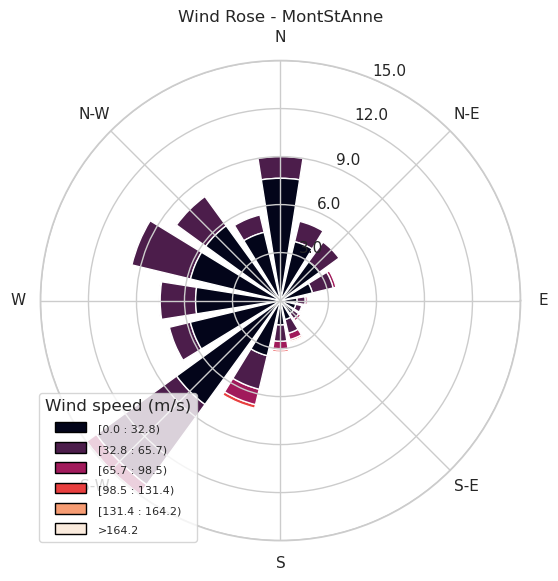

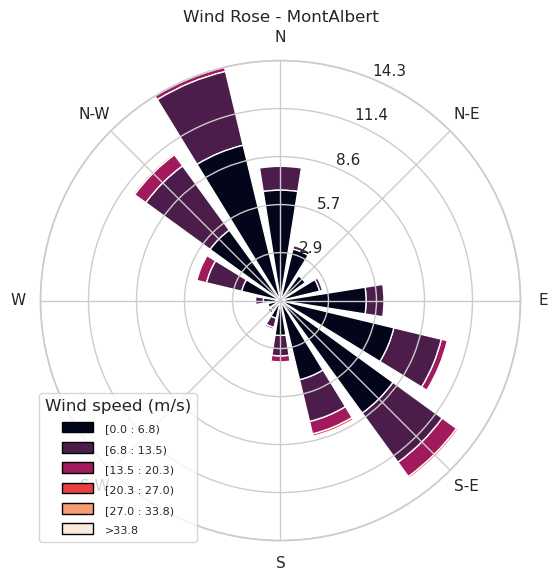

In [7]:
for station_name, df in data.items():
    if "VVi" not in df.columns:
        continue
    ws = df["VVi"]
    wd = df["VDi"]
    
    fig = plt.figure(figsize=(6,6))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend(title="Wind speed (m/s)")
    plt.title(f"Wind Rose - {station_name}")
    plt.show()

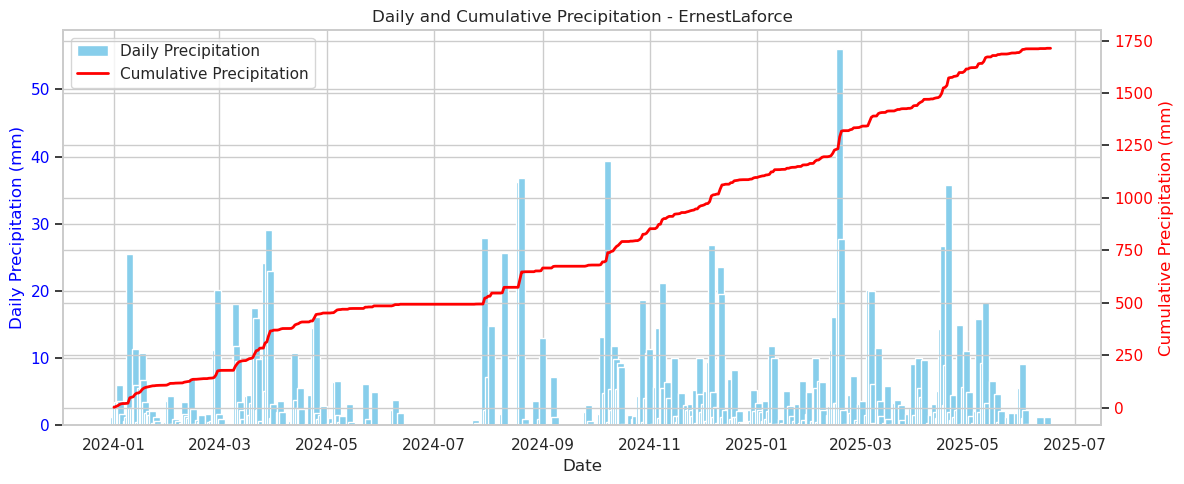

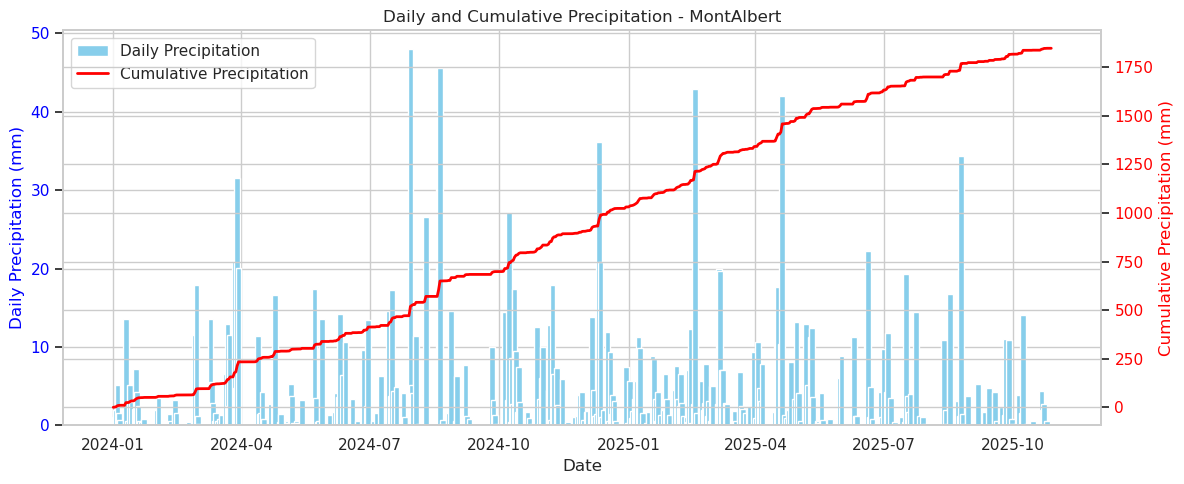

In [6]:
for station_name, df in data.items():
    if "PT" not in df.columns:
        continue
    
    # Resample daily precipitation
    precip = df["PT"].resample("1D").sum().fillna(0)
    
    # Cumulative precipitation
    cum_precip = precip.cumsum()
    
    # Plot
    fig, ax1 = plt.subplots(figsize=(12,5))
    
    # Bar: daily precipitation
    ax1.bar(precip.index, precip, color='skyblue', width=4, label='Daily Precipitation')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Daily Precipitation (mm)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Line: cumulative precipitation
    ax2 = ax1.twinx()
    ax2.plot(precip.index, cum_precip, color='red', linewidth=2, label='Cumulative Precipitation')
    ax2.set_ylabel("Cumulative Precipitation (mm)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Title and grid
    plt.title(f"Daily and Cumulative Precipitation - {station_name}")
    ax1.grid(True)
    
    # Legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()